# Variants of A* Search

In this lab I will be make a variant of A* search, Weighted A* which is similar to A* but instead of only one heuristic function we are using 2 heuristic function which are multiplied by a weight which gets updated dynamically. The weight I have set to update each round (When we find one new node we update the weight). To update the weight I first calculate the total number of moves performed so far and then divide that by total number of edges so we get a ratio to (b/w 0 and 1) and we can use it as a weight to divide both the heuirstics. heuristic 1 is the difference between the node number. That is if we have two nodes A and C then heuristic value will be ord(C) - ord(A) = 2. Then second heuirstic we have is number of edges possible at a node. As more edges mean more options to send data in different paths to it will be better and faster in real life so I have made that as the second heuristic. initailly we will completely depend on H2 and as time moves we will convert to H1 as in future we need less exploration and more pin point location so thats how I modelled the search too (ratio is 1-w --> H2 and w --> H1).

In [1]:
class Computer_network:
    def __init__(self, adjacency_list, computer_mapping):
        self.adjacency_list = adjacency_list
        self.computer_mapping = computer_mapping
    
    def get_neighbors(self, node):
        return self.adjacency_list[node]
    
    def get_delay(self, node1, node2):
        return abs(ord(node1) - ord(node2))
    
    def heuristic_function1(self, n, stop_node):
        node = self.computer_mapping[n]
        bandwidth = node[0]
        reliability = node[1]
        delay = self.get_delay(n, stop_node)
        
        return (delay*256/(bandwidth*reliability))
    
    def heuristic_function2(self, n):
        total_nodes = len(self.adjacency_list)
        num_of_neighbors = len(self.get_neighbors(n))
        return total_nodes//num_of_neighbors
    
    def number_of_edges(self):
        edges = 0
        for node in adjacency_list:
            for edge in adjacency_list[node]:
                edges += 1
        
        return edges//2
    
    def weighted_a_star(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])
        g = {}
        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node
        
        total_edges = self.number_of_edges()
        w = 0
        moves = 0
        while len(open_list) > 0:
            n = None
            for node in open_list:
                if n == None or (g[node] + (1-w)*self.heuristic_function2(node) + (w)*self.heuristic_function1(node, stop_node)) < (g[n] + (1-w)*self.heuristic_function2(n) + w*self.heuristic_function1(n, stop_node)):
                    n = node
            
            if n == None:
                print('No path exists...')
                return None
            
            if n == stop_node:
                path = []
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
                    
                path.append(start_node)
                path.reverse()
                
                print('Path Found:', path)
                return path
        
            for (m, weight) in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n
                    
                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)
            moves += 1
            w = moves // total_edges
            open_list.remove(n)
            closed_list.add(n)

        print('No path exists...')
        return None

In [2]:
adjacency_list = {
    'A': [('B', 2), ('C', 2), ('D', 3)],
    'B': [('A', 2)],
    'C': [('A', 2), ('E', 5)],
    'D': [('A', 3), ('E', 7 ), ('F', 6), ('G', 10)],
    'E': [('C', 5), ('D', 7), ('F', 5), ('H', 4)],
    'F': [('D', 6), ('E', 5), ('G', 2), ('H', 3)],
    'G': [('D', 10), ('F', 2), ('H', 5), ('J', 2)],
    'H': [('E', 4), ('F', 3), ('G', 5), ('I', 2)],
    'I': [('H', 2), ('J', 1)],
    'J': [('G', 2), ('I', 1)],
}

# 'Node': [banwidth, reliablity, delay]

computer_mapping = {'A': [5, 50, 20], 'B': [20, 75, 25], 'C': [40, 60, 15], 'D': [2, 25, 12], 'E': [0.5, 85, 10], 
                    'F': [40, 55, 8], 'G': [15, 75, 6], 'H': [20, 80, 7], 'I': [3, 100, 3], 'J': [10, 90, 0]}

network = Computer_network(adjacency_list, computer_mapping)
network.weighted_a_star('A', 'J')

Path Found: ['A', 'D', 'F', 'G', 'J']


['A', 'D', 'F', 'G', 'J']

## Visulizing Networks

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
def plot_network_graph(adjacency_list, computer_mapping):
    G = nx.Graph()
    for node in computer_mapping:
        G.add_node(node)
    for node in adjacency_list:
        for edge in adjacency_list[node]:
            G.add_edge(node, edge[0], weight=edge[1])
    pos=nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos,with_labels=True, font_weight='bold', node_size=1000, font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw
    plt.show()

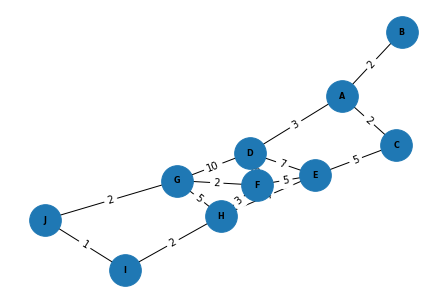

In [5]:
plot_network_graph(adjacency_list, computer_mapping)

In [6]:
def plot_path_graph(path, computer_mapping, adjacency_list):
    G_path = nx.Graph()
    for node in computer_mapping:
        G_path.add_node(node)
    for node in adjacency_list:
        for edge in adjacency_list[node]:
            G_path.add_edge(node, edge[0], weight=edge[1], mode="wired")
    
    color_map = []
    for node in G_path:
        if node in path:
            color_map.append('red')
        else:
            color_map.append('yellow')
    path_index = 0
    edge_colors = []
    for u, v in G_path.edges():
        if(path_index < len(path)-1 and (u == path[path_index] and v==path[path_index+1])): 
            edge_colors.append('red')
            path_index += 1
        else:
            edge_colors.append('black')
    
    pos=nx.spring_layout(G_path)
    edges = G_path.edges()
    edge_labels = nx.get_edge_attributes(G_path, 'weight')
    nx.draw(G_path, pos, with_labels=True, font_weight='bold', edge_color=edge_colors, node_color=color_map)
    nx.draw_networkx_edge_labels(G_path, pos, edge_labels=edge_labels)
    plt.show()

Path Found: ['A', 'D', 'F', 'G', 'J']


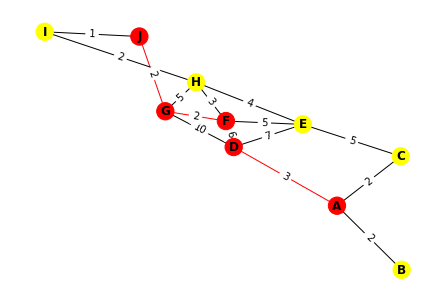

In [7]:
network = Computer_network(adjacency_list, computer_mapping)
path = network.weighted_a_star('A', 'J')
plot_path_graph(path, computer_mapping, adjacency_list)

## With more complexity (Different types of connections)

In [8]:
class Computer_network_complex:
    def __init__(self, adjacency_list_wired, adjacency_list_online,computer_mapping, packet_type = "Both"):
        self.adjacency_list_wired = adjacency_list_wired
        self.adjacency_list_online = adjacency_list_online
        self.computer_mapping = computer_mapping
        self.packet_type = packet_type; # Possible values: Wired, Wireless, Both
    
    def get_neighbors_wired(self, node):
        return self.adjacency_list_wired[node]
    
    def get_neighbors_online(self, node):
        return self.adjacency_list_online[node]
    
    def get_neighbors_both(self, node):
        neighbours = {}
        for i in adjacency_list_wired:
            neighbours[i] = self.adjacency_list_wired[i] + self.adjacency_list_online[i]
        return neighbours[node]
    
    def get_delay(self, node1, node2):
        return abs(ord(node1) - ord(node2))
    
    def number_of_nodes(self):
        return len(adjacency_list_wired)
    
    def number_of_edges(self):
        edges = 0
        if(self.packet_type == "Wired"): 
            for node in self.adjacency_list_wired:
                for edge in self.adjacency_list_wired[node]:
                    edges += 1
        elif(self.packet_type == "Wireless"): 
            for node in self.adjacency_list_online:
                for edge in self.adjacency_list_online[node]:
                    edges += 1
        else:
            for node in self.adjacency_list_wired:
                for edge in self.adjacency_list_wired[node]:
                    edges += 1
            for node in self.adjacency_list_online:
                for edge in self.adjacency_list_online[node]:
                    edges += 1
        
        return edges//2
    
    def heuristic_function1(self, n, stop_node):
        node = self.computer_mapping[n]
        bandwidth = node[0]
        reliability = node[1]
        delay = self.get_delay(n, stop_node)
        
        return (delay*256/(bandwidth*reliability))
    
    def heuristic_function2(self, n):
        total_nodes = self.number_of_nodes()
        if(self.packet_type == "Wired"):
            num_of_neighbors = len(self.get_neighbors_wired(n))
        elif(self.packet_type == "Wireless"):
            num_of_neighbors = len(self.get_neighbors_online(n))
        else:
            num_of_neighbors = len(self.get_neighbors_both(n))
        return (total_nodes // num_of_neighbors)
    
    def weighted_a_star(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])
        g = {}
        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node
        
        total_edges = self.number_of_edges()
        w = 0
        moves = 0
        while len(open_list) > 0:
            n = None
            for node in open_list:
                if n == None or (g[node] + (1-w)*self.heuristic_function2(node) + w*self.heuristic_function1(node, stop_node)) < (g[n] +  (1-w)*self.heuristic_function2(node) + w*self.heuristic_function1(n, stop_node)):
                    n = node
            
            if n == None:
                print('No path exists...')
                return None
            
            if n == stop_node:
                path = []
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
                    
                path.append(start_node)
                path.reverse()
                
                print('Path Found:', path)
                return path
            
            if(self.packet_type == "Wired"):
                for (m, weight) in self.get_neighbors_wired(n):
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            elif(self.packet_type == "Online"):
                for (m, weight) in self.get_neighbors_online(n):
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            elif(self.packet_type == "Both"):
                for (m, weight) in self.get_neighbors_both(n):
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            else:
                print("Inappropriate packet type selected")
                break
            
            moves += 1
            w = moves // total_edges
            open_list.remove(n)
            closed_list.add(n)

        print('No path exists...')
        return None

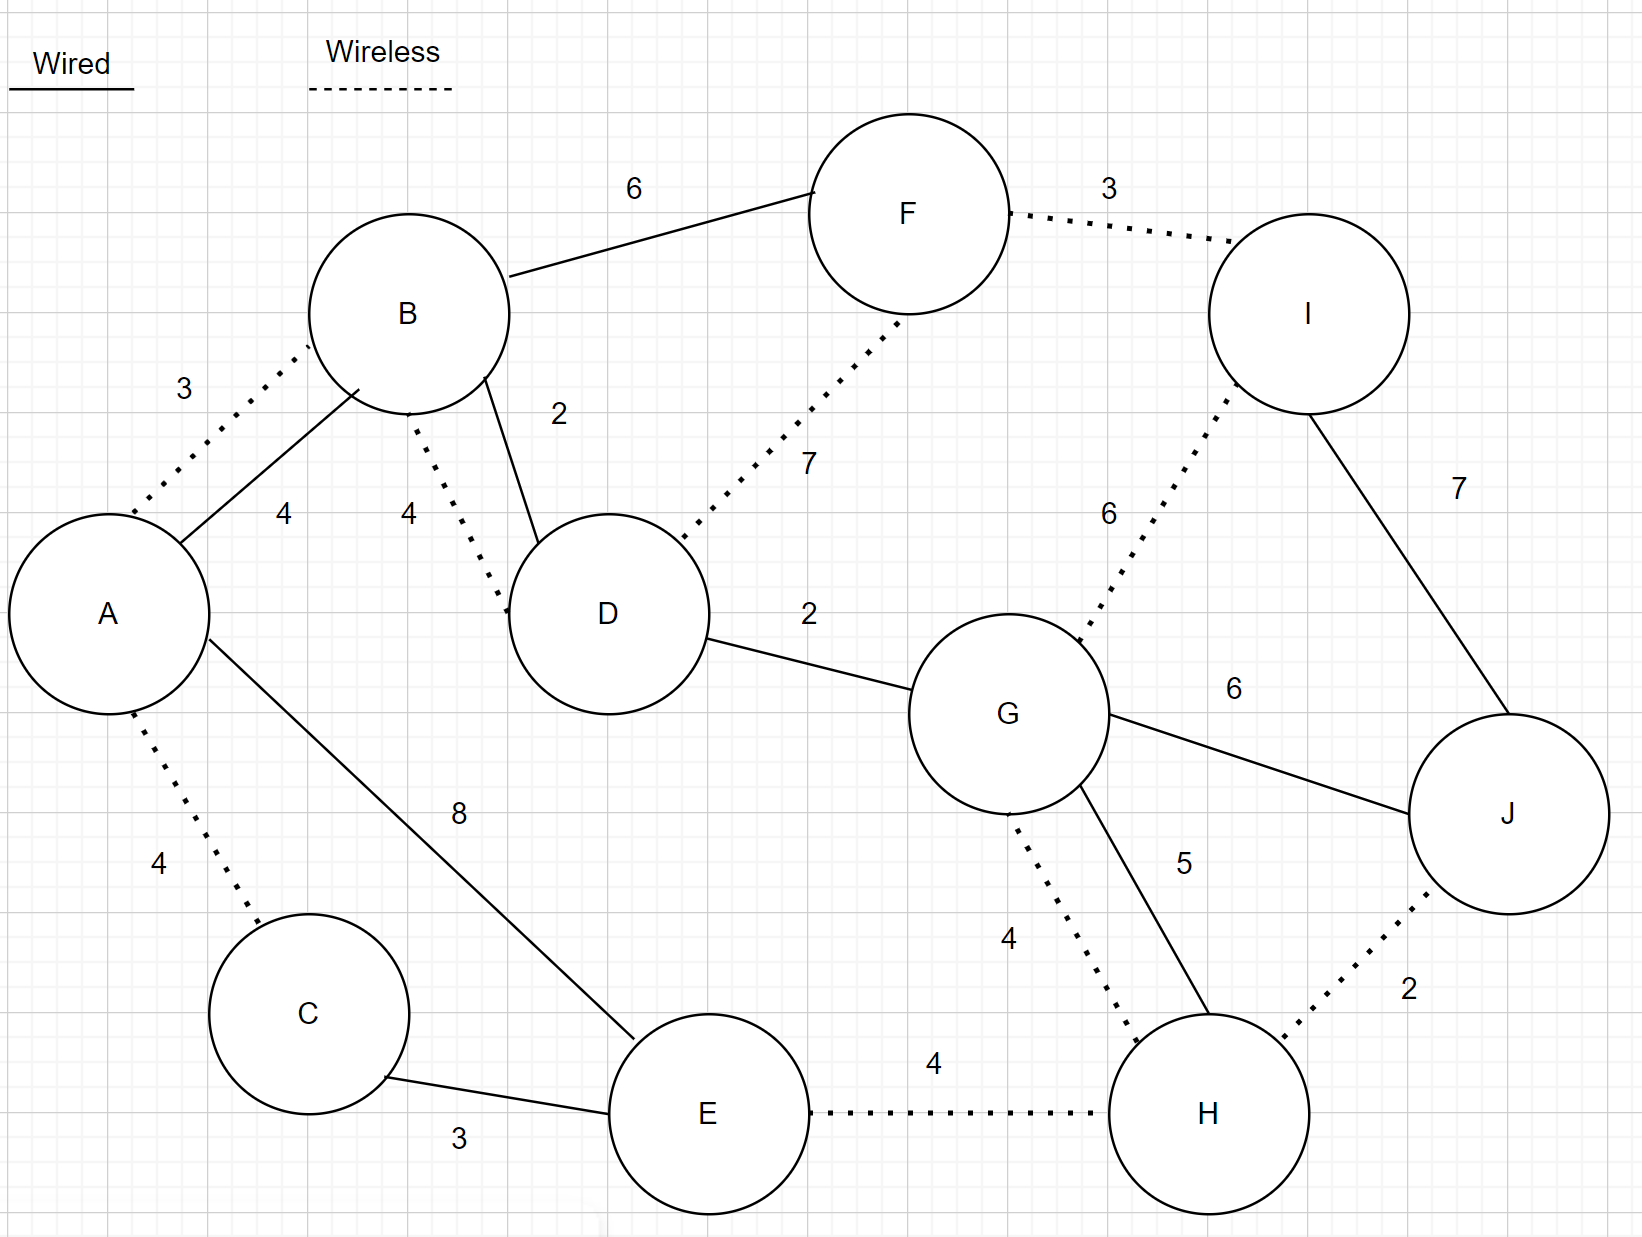

In [9]:
adjacency_list_wired = {
    'A': [('B', 4), ('E', 8)],
    'B': [('A', 4), ('D', 2), ('F', 6)],
    'C': [('E', 3)],
    'D': [('B', 2), ('G', 2)],
    'E': [('A', 8), ('C', 3)],
    'F': [('B', 6)],
    'G': [('D', 2), ('H', 5), ('J', 6)],
    'H': [('G', 5)],
    'I': [('J', 7)],
    'J': [('G', 6), ('I', 7)],
}

adjacency_list_wireless = {
    'A': [('B', 3), ('C', 4)],
    'B': [('A', 3), ('D', 4)],
    'C': [('A', 4)],
    'D': [('B', 4), ('F', 7)],
    'E': [('H', 4)],
    'F': [('D', 7), ('I', 3)],
    'G': [('H', 4), ('I', 6)],
    'H': [('E', 4), ('G', 4), ('J', 2)],
    'I': [('F', 3), ('G', 6)],
    'J': [('H', 2)],
}

# 'Node': [banwidth, reliablity, delay]

computer_mapping = {'A': [5, 50], 'B': [20, 75], 'C': [40, 60], 'D': [2, 25], 'E': [0.5, 85], 
                    'F': [40, 55], 'G': [15, 75], 'H': [20, 80], 'I': [3, 100], 'J': [10, 90]}

network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Online")
network.weighted_a_star('A', 'J')

Path Found: ['A', 'B', 'D', 'F', 'I', 'G', 'H', 'J']


['A', 'B', 'D', 'F', 'I', 'G', 'H', 'J']

In [10]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Wired")
network.weighted_a_star('A', 'J')

Path Found: ['A', 'B', 'D', 'G', 'J']


['A', 'B', 'D', 'G', 'J']

In [11]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Both")
network.weighted_a_star('A', 'J')

Path Found: ['A', 'B', 'D', 'G', 'J']


['A', 'B', 'D', 'G', 'J']

In [12]:
def draw_path_graph(path, computer_mapping, adjacency_list_wired, adjacency_list_wireless):
    G_path = nx.Graph()
    for node in computer_mapping:
        G_path.add_node(node)
    for node in adjacency_list_wired:
        for edge in adjacency_list_wired[node]:
            G_path.add_edge(node, edge[0], weight=edge[1], mode="wired")

    for node in adjacency_list_wireless:
        for edge in adjacency_list_wireless[node]:
            G_path.add_edge(node, edge[0],weight=edge[1], mode="wireless")
    
    color_map = []
    for node in G_path:
        if node in path:
            color_map.append('red')
        else:
            color_map.append('yellow')
    path_index = 0
    edge_colors = []
    for u, v in G_path.edges():
        if(path_index < len(path)-1 and (u == path[path_index] and v==path[path_index+1])): 
            edge_colors.append('red')
            path_index += 1
        else:
            edge_colors.append('black')
    
    pos=nx.spring_layout(G_path)
    edges = G_path.edges()
    edge_labels = nx.get_edge_attributes(G_path, 'weight')
    nx.draw(G_path, pos, with_labels=True, font_weight='bold', edge_color=edge_colors, node_color=color_map)
    nx.draw_networkx_edge_labels(G_path, pos, edge_labels=edge_labels)
    plt.show()

Path Found: ['A', 'B', 'D', 'G', 'J']


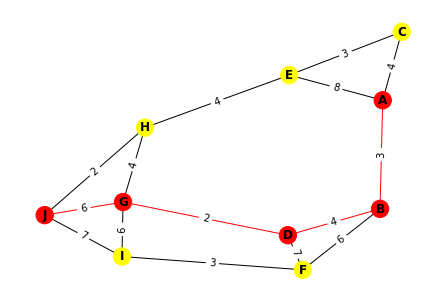

In [13]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Both")
path = network.weighted_a_star('A', 'J')
draw_path_graph(path, computer_mapping, adjacency_list_wired, adjacency_list_wireless)

Path Found: ['A', 'B', 'D', 'F', 'I', 'G', 'H', 'J']


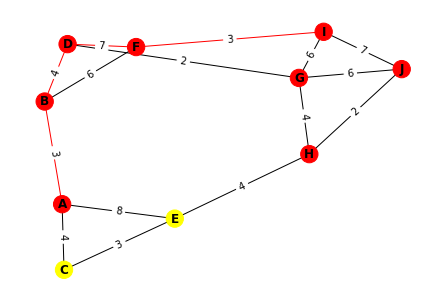

In [14]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Online")
path = network.weighted_a_star('A', 'J')
draw_path_graph(path, computer_mapping, adjacency_list_wired, adjacency_list_wireless)

Path Found: ['A', 'B', 'D', 'G', 'J']


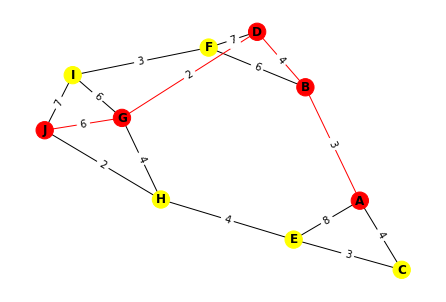

In [15]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Wired")
path = network.weighted_a_star('A', 'J')
draw_path_graph(path, computer_mapping, adjacency_list_wired, adjacency_list_wireless)